In [76]:
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import arff

In [77]:
## testing with one file

filenames = ['C:/Users/vinny/Documents/GitHub/Tech-Troopers/Ranvir/Comparing the results/xgboost-results/electricity.csv_shuffle_0.pkl',]
            #  'C:/Users/vinny/Documents/GitHub/Tech-Troopers/Ranvir/Comparing the results/xgboost-results/electricity.csv_shuffle_1.pkl',
            #  'C:/Users/vinny/Documents/GitHub/Tech-Troopers/Ranvir/Comparing the results/xgboost-results/electricity.csv_shuffle_2.pkl',
            #  'C:/Users/vinny/Documents/GitHub/Tech-Troopers/Ranvir/Comparing the results/xgboost-results/electricity.csv_shuffle_3.pkl',
            #  'C:/Users/vinny/Documents/GitHub/Tech-Troopers/Ranvir/Comparing the results/xgboost-results/electricity.csv_shuffle_4.pkl']  

data = []
for filename in filenames:
    with open(filename, 'rb') as f:
        data.append(pickle.load(f))

In [78]:
## Creating a df with the values in pickle file for comparison
tempdf = pd.DataFrame(pd.Series(data[0][0]['hyperparameters']).to_frame().T)
tempdf['val_accuracy'] = data[0][0]['val_accuracy']
tempdf['test_accuracy'] = data[0][0]['test_accuracy']
tempdf['train_accuracy'] = data[0][0]['train_accuracy']

tempdf

,alpha,colsample_bylevel,colsample_bytree,gamma,lambda,learning_rate,max_depth,min_child_weight,n_estimators,subsample,val_accuracy,test_accuracy,train_accuracy
0,0.574938,0.780608,0.715729,1.424686e-08,2.258314,0.073485,7.0,48.0,600.0,0.993328,0.876372,0.871179,0.926219


In [79]:
## Main code

file_paths = [
    'C:/Users/vinny/Documents/GitHub/Tech-Troopers/Ranvir/Comparing the results/xgboost-results/electricity.csv_shuffle_0.pkl',
    'C:/Users/vinny/Documents/GitHub/Tech-Troopers/Ranvir/Comparing the results/xgboost-results/electricity.csv_shuffle_1.pkl',
    'C:/Users/vinny/Documents/GitHub/Tech-Troopers/Ranvir/Comparing the results/xgboost-results/electricity.csv_shuffle_2.pkl',
    'C:/Users/vinny/Documents/GitHub/Tech-Troopers/Ranvir/Comparing the results/xgboost-results/electricity.csv_shuffle_3.pkl',
    'C:/Users/vinny/Documents/GitHub/Tech-Troopers/Ranvir/Comparing the results/xgboost-results/electricity.csv_shuffle_4.pkl'
]

## empty list
dfs = []

## looping on file parhs
for i, file_path in enumerate(file_paths):
 
    with open(file_path, 'rb') as f:
        model_data = pickle.load(f)

    # looping over the data in pickle files  
    for j, iteration_data in enumerate(model_data):
        df = pd.DataFrame(pd.Series(iteration_data['hyperparameters']).to_frame().T)
        df['val_accuracy'] = iteration_data['val_accuracy']
        df['test_accuracy'] = iteration_data['test_accuracy']
        df['train_accuracy'] = iteration_data['train_accuracy']

        # identifiers for the rows
        df['model_id'] = f'model_{i+1}'
        df['iteration'] = j+1

        dfs.append(df)

# Concatenating all the dfs
final_df = pd.concat(dfs, ignore_index=True)

# Print the final DataFrame
final_df

,alpha,colsample_bylevel,colsample_bytree,gamma,lambda,learning_rate,max_depth,min_child_weight,n_estimators,subsample,val_accuracy,test_accuracy,train_accuracy,model_id,iteration
0,5.749382e-01,0.780608,0.715729,1.424686e-08,2.258314,0.073485,7.0,48.0,600.0,0.993328,0.876372,0.871179,0.926219,model_1,1
1,9.267871e+01,0.756863,0.632614,1.212931e-01,3.727586,0.000116,4.0,8.0,1800.0,0.506647,0.756499,0.759312,0.764398,model_1,2
2,4.820196e-03,0.693358,0.558490,1.874660e-05,3.093945,0.064629,6.0,36.0,3200.0,0.511305,0.859619,0.855340,0.912926,model_1,3
3,1.000093e-05,0.988972,0.554759,2.597698e-05,1.551048,0.162726,10.0,8.0,5600.0,0.821831,0.880127,0.875387,0.999851,model_1,4
4,9.091039e+00,0.523310,0.851557,5.704399e-07,1.414856,0.000201,9.0,25.0,3800.0,0.744252,0.804159,0.803613,0.815083,model_1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,7.118133e+01,0.540523,0.655014,7.629389e-01,1.261984,0.000626,9.0,2.0,1600.0,0.761096,0.782496,0.786041,0.795997,model_5,46
246,1.502052e-03,0.740793,0.935551,9.526762e-07,1.045720,0.005309,6.0,23.0,1000.0,0.901927,0.828712,0.822052,0.837919,model_5,47
247,2.038188e-03,0.560671,0.953545,3.780651e-02,1.062221,0.000024,6.0,7.0,3600.0,0.549098,0.794050,0.791610,0.802570,model_5,48
248,2.132552e-03,0.864284,0.554986,8.848680e-08,3.106938,0.017320,10.0,26.0,2600.0,0.937892,0.866262,0.858681,0.917493,model_5,49


In [80]:
import numpy as np

C:\Users\vinny\AppData\Local\Temp\ipykernel_27412\3069996422.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = final_df.corr()


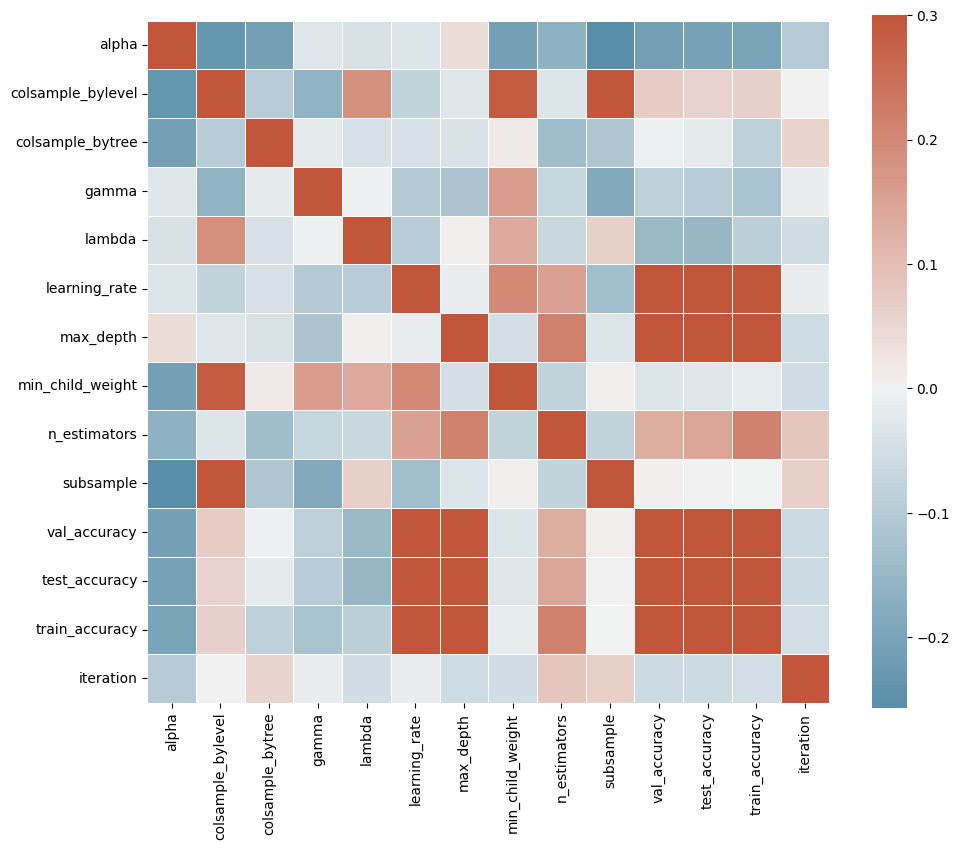

In [81]:
# Compute the correlation matrix
corr = final_df.corr()

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

plt.show()

In [82]:
## Highest validation accuracy:

row_with_highest_val_accuracy = final_df.loc[final_df['val_accuracy'].idxmax()]
print(row_with_highest_val_accuracy)

alpha                0.014623
colsample_bylevel    0.662817
colsample_bytree     0.607295
gamma                0.023841
lambda               1.167327
learning_rate        0.432529
max_depth                 8.0
min_child_weight          2.0
n_estimators           3400.0
subsample            0.897222
val_accuracy         0.883016
test_accuracy        0.880337
train_accuracy       0.999963
model_id              model_1
iteration                  38
Name: 37, dtype: object


In [83]:
## Highest test accuracy:

row_with_highest_val_accuracy = final_df.loc[final_df['test_accuracy'].idxmax()]
print(row_with_highest_val_accuracy)

alpha                0.014623
colsample_bylevel    0.662817
colsample_bytree     0.607295
gamma                0.023841
lambda               1.167327
learning_rate        0.432529
max_depth                 8.0
min_child_weight          2.0
n_estimators           3400.0
subsample            0.897222
val_accuracy         0.883016
test_accuracy        0.880337
train_accuracy       0.999963
model_id              model_1
iteration                  38
Name: 37, dtype: object
